<a href="https://colab.research.google.com/github/titocampos/estudo-crm/blob/master/Redes_Convolucionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolução
Em matemática a mistura de duas funcões é casualmente chamada de convolução. No aprendizado de máquina, uma convolução mistura o filtro convolucional e a matriz de entrada para treinar pesos.

O termo "convolução" no aprendizado de máquina geralmente é uma maneira abreviada de se referir à operação convolucional ou à camada convolucional.

Sem convoluções, um algoritmo de aprendizado de máquina teria que aprender um peso separado para cada célula em um tensor grande. Por exemplo, o aprendizado de máquina em imagens 2000x2000 pixel seria forçado a encontrar 4 milhoes de pesos separados. Graças às convoluções, um algoritmo de aprendizado de máquina precisa apenas encontrar pesos para cada célula no filtro convolucional, reduzindo drasticamente a memória necessária para treinar o modelo. Quando o filtro convolucional é aplicado, ele é simplesmente replicado nas células, de modo que cada uma é multiplicada pelo filtro.

## Filtro convolucional

Um dos atores em uma operação convolucional é o filtro convulacional, o  outro ator é uma fatia de uma matriz de entrada. Um filtro convolucional é uma matriz com a mesma classificação que a matriz de entrada, mas com uma forma menor. Por exemplo, dada uma matriz de entrada 28x28, o filtro pode ser qualquer matriz 2D menor que 28x28.

Na manipulação fotográfica, todas as células em um filtro convolucional são tipicamente definidas para um padrão constante de uns e zeros. No aprendizado de máquina, os filtros convolucionais geralmente são semeados com números aleatórios e, em seguida, a rede treina os valores ideais.

## Operação convolucional

É a multiplicação entre todos os elementos do filtro convolucional e uma fatia da matriz de entrada. A fatia da matriz de entrada deve ter o mesmo tamanho que o filtro convolucional.
Soma-se todos os valores resultantes da multiplicacao entre o filtro convolucional e a fatia da matriz de entrada, como no exemplo a matriz 5x5 e o filtro 3x3 indicados gerariam as seguintes operações.


```
 Matriz = [[128, 97, 53, 201, 198],           Filtro = [[0, 1, 0],       
           [35, 22, 25, 200, 195],                      [1, 0, 1],       
           [37, 24, 28, 197, 182],                      [0, 1, 0]]
           [33, 28, 92, 195, 179],
           [31, 40, 100, 192, 177]]
```
Resulta em:
```
Rst=[[128*0 + 97*1 + 53*0 + 35*1 + 22*0 + 25*1 + 37*0 + 24*1 + 28*0],       #181
     [97*0 + 53*1 + 201*0 + 22*1 + 25*0 + 200*1 + 24*0 + 28*1 + 197*0],     #303
     [53*0 + 201*1 + 198*0 + 25*1 + 200*0 + 195*1 + 28*0 + 197*1 + 182*0],  #618
     [35*0 + 22*1 + 25*0 + 37*1 + 24*0 + 28*1 + 33*0 + 28*1 + 92*0],        #115
     [22*0 + 25*1 + 200*0 + 24*1 + 28*0 + 197*1 + 28*0 + 92*1 + 195*0],     #338
     [25*0 + 200*1 + 195*0 + 28*1 + 197*0 + 182*1 + 92*0 + 195*1 + 179*0],  #605
     [37*0 + 24*1 + 28*0 + 33*1 + 28*0 + 92*1 + 31*0 + 40*1 + 100*0],       #189
     [24*0 + 28*1 + 197*0 + 28*1 + 92*0 + 195*1 + 40*0 + 100*1 + 192*0],    #351
     [28*0 + 197*1 + 182*0 + 92*1 + 195*0 + 179*1 + 100*0 + 192*1 + 177*0]] #660
```

Em python seria algo como:



In [19]:
import numpy as np

matriz = np.array([[128, 97, 53, 201, 198],           
                   [35, 22, 25, 200, 195],                      
                   [37, 24, 28, 197, 182],                      
                   [33, 28, 92, 195, 179],
                   [31, 40, 100, 192, 177]])

filter = np.array([[0, 1, 0],                  
                   [1, 0, 1],       
                   [0, 1, 0]])

result = np.zeros((3,3))

for x in range(1, 4):
  for y in range(1, 4):
      output_pixel = 0.0
      output_pixel = output_pixel + (matriz[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (matriz[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (matriz[x + 1, y-1] * filter[0][2])

      output_pixel = output_pixel + (matriz[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (matriz[x, y] * filter[1][1])
      output_pixel = output_pixel + (matriz[x+1, y] * filter[1][2])

      output_pixel = output_pixel + (matriz[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (matriz[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (matriz[x+1, y+1] * filter[2][2])

      result[x-1, y-1] = output_pixel

print(result)

[[181. 303. 618.]
 [115. 338. 605.]
 [189. 351. 660.]]


## Usos de convoluções

No tratamento de imagens filtros especiais são utilizados para aplicar efeitos as imagens. Abaixo alguns exemplos:

In [0]:
#importando blibliotecas
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

In [0]:
def conv(img, filter, weight):
  '''
    img: imagem original
    filter: filtro a ser aplicado
    weight:
       Se todos os dígitos do filtro não somarem 0 ou 1, você
       provavelmente deve fazer um peso para fazê-lo
       Então, por exemplo, se seus pesos forem 1,1,1 1,2,1 1,1,1
       eles somam 10, então você definiria um peso de 0.1 se quiser normalizá-los.
  '''       
  size_x, size_y = img.shape
  rst = np.zeros((size_x,size_y))
  for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        output_pixel = 0.0
        output_pixel = output_pixel + (img[x - 1, y-1] * filter[0][0])
        output_pixel = output_pixel + (img[x, y-1] * filter[0][1])
        output_pixel = output_pixel + (img[x + 1, y-1] * filter[0][2])
        output_pixel = output_pixel + (img[x-1, y] * filter[1][0])
        output_pixel = output_pixel + (img[x, y] * filter[1][1])
        output_pixel = output_pixel + (img[x+1, y] * filter[1][2])
        output_pixel = output_pixel + (img[x-1, y+1] * filter[2][0])
        output_pixel = output_pixel + (img[x, y+1] * filter[2][1])
        output_pixel = output_pixel + (img[x+1, y+1] * filter[2][2])
        output_pixel = output_pixel * weight
        if(output_pixel<0):
          output_pixel=0
        if(output_pixel>255):
          output_pixel=255
        rst[x, y] = output_pixel
  return rst

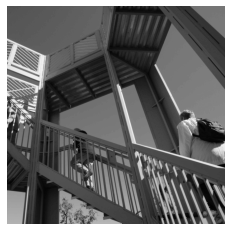

In [40]:
#carregando e plotando a imagem de teste
img = misc.ascent()
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

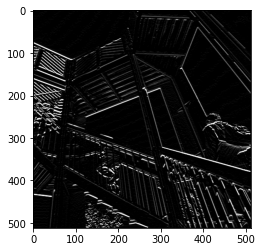

In [41]:
# Este filtro detecta linhas verticais 
filter = [[-1,0,1],[-2,0,2],[-1,0,1]] 

i_transformed = np.copy(img)
plt.gray()
plt.grid(False)
plt.imshow(conv(i_transformed, filter, 1))
plt.show()   

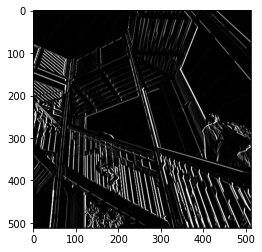

In [42]:
# Este filtro detecta linhas horizontais
filter = [[-1,-2,-1],[0,0,0],[1,2,1]] 

i_transformed = np.copy(img)
plt.gray()
plt.grid(False)
plt.imshow(conv(i_transformed, filter, 1))
plt.show()   

## Rede neural convolucional

É uma rede neural na qual pelo menos uma das camadas é uma camada convolucional. Esta camada será utilizada para apreder "features" da imagem. Uma rede neural convolucional típica consiste em alguma combinação das seguintes camadas:

- camadas convolucionais
- camadas de pooling
- camadas densas

São muito utilizadas nos problemas relacionados a visão computacional.